In [1]:
from selenium import webdriver
#특정 태그를 선택(id,class,xpath)
from selenium.webdriver.common.by import By
#키보드의 특정 이벤트를 불러오기 기능
from selenium.webdriver.common.keys import Keys

In [2]:
# 웹 브라우져 실행
driver = webdriver.Chrome()

In [3]:
# driver에 특정 주소를 입력, 요청
driver.get('https://www.naver.com')

- webdriver에서 태그를 찾는 함수
    - find_element()
        - 특정 태그 하나를 선택
        - bs4에서 find() 같은 기능
    - find_elements()
        - 조건에 맞는 모든 태그를 선택
        - bs4에서 find_all() 같은 기능

In [4]:
# html 문서 안에서 id 속성이 query 태그 선택
element = driver.find_element(By.ID, "query")

In [5]:
# 검색창(element)에 특정 문자열을 입력한다. -> 검색할 단어
element.send_keys('날씨')

In [6]:
# element에 ENTER라는 키보드 이벤트를 발생
element.send_keys(Keys.ENTER)

In [7]:
# driver에서 class가 'list_news'인 태그를 모두 찾아서 개수 확인
len(driver.find_elements(By.CLASS_NAME,'list_news'))

1

In [8]:
list_news_tag = \
    driver.find_element(By.CLASS_NAME,'list_news')

In [9]:
# 'list_news_tag'에서 class가 'new_area'인 태그 찾기
len(
    list_news_tag.find_elements(By.CLASS_NAME,'news_area')
)

4

In [10]:
news_link_list = \
    list_news_tag.find_elements(By.CLASS_NAME,'news_area')

In [11]:
news_link_list

[<selenium.webdriver.remote.webelement.WebElement (session="d9792ef326fcfba48c699b90cfc72d65", element="f.8FEA7004F473E99F88DFA35579CCB5FD.d.05A05D75585D41B35D9560AAE13132FA.e.4493")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d9792ef326fcfba48c699b90cfc72d65", element="f.8FEA7004F473E99F88DFA35579CCB5FD.d.05A05D75585D41B35D9560AAE13132FA.e.4494")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d9792ef326fcfba48c699b90cfc72d65", element="f.8FEA7004F473E99F88DFA35579CCB5FD.d.05A05D75585D41B35D9560AAE13132FA.e.4495")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d9792ef326fcfba48c699b90cfc72d65", element="f.8FEA7004F473E99F88DFA35579CCB5FD.d.05A05D75585D41B35D9560AAE13132FA.e.4496")>]

In [14]:
# news_link_list의 첫번째 원소를 마우스 클릭 이벤트 생성
news_link_list[0].find_element(By.CLASS_NAME, 'news_contents').click()

In [15]:
import pprint

('<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) '
 'applewebkit/537.36 (khtml, like gecko) chrome/134.0.0.0 safari/537.36" '
 'data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" '
 'content="always">  <meta name="format-detection" '
 'content="telephone=no,address=no,email=no"> <meta property="og:title" '
 'content="날씨 : 네이버 검색"> <meta property="og:image" '
 'content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta '
 'property="og:description" content="\'날씨\'의 네이버 검색 결과입니다."> <meta '
 'name="description" lang="ko" content="\'날씨\'의 네이버 검색 결과입니다."> <title>날씨 : '
 '네이버 검색</title> <link rel="shortcut icon" '
 'href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico">  '
 '<link rel="search" type="application/opensearchdescription+xml" '
 'href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" '
 'title="Naver"><link rel="stylesheet" type="text/css" '
 'href="https://ssl.pstatic
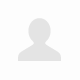
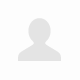

In [16]:
# driver html 문서를 불러오려면
# driver 안에 page_source 존재
pprint.pprint(driver.page_source)
# 현재 페이지 위치는 뉴스, 그러나 보여지는 source는 1번째 화면

In [17]:
# 브라우저에 탭이 여러 개 생기는 경우 탭 이동
# 탭들의 주소를 확인
driver.window_handles

['6E5EF58E809DED844EC1CA70E712E832', '326F88D9430B76471C0304F9D9E6CF5B']

In [18]:
# driver의 탭을 이동
driver.switch_to.window(driver.window_handles[1])

In [19]:
from bs4 import BeautifulSoup as bs

In [30]:
soup = bs(driver.page_source, 'html.parser')

In [42]:
soup.find('title').get_text()

'수도권·강원내륙 한때 약한 비…일교차 15도 내외[오늘날씨] :: 공감언론 뉴시스 :: '

In [40]:
div_data = soup.find('div',attrs={
    'class': 'viewer'
    }
).get_text().replace('\n','')

In [41]:
div_data

"아침 최저 0~8도, 낮 최고 10~17도서울 아침 최저 6도, 낮 최고 11도낮과 밤의 기온차, 15도 내외 클 듯[서울=뉴시스] 김진아 기자 = 낮 기온이 15도까지 오르는 등 포근한 날씨를 보인 11일 서울 광화문광장에서 시민들이 외투를 벗고 있다. 2025.03.11. bluesoda@newsis.com[서울=뉴시스]이수정 기자 = 수요일인 12일은 수도권과 강원 내륙에 한때 약한 비가 내리겠다.기상청은 이날 오후에는 수도권과 강원 내륙·산지에, 오후부터 저녁 사이 제주도에 가끔 비가 내리는 곳이 있겠다고 예보했다. 오전부터 저녁 사이에는 충남권과 전라권에, 오후부터 저녁 사이 충북에는 0.1㎜ 미만의 빗방울이 떨어지는 곳도 있겠다.예상 강수량은 ▲서해5도 5㎜ 미만 ▲서울·인천·경기 1㎜ 내외 ▲강원 내륙·산지 1㎜ 내외 ▲제주도 5㎜ 미만 등이다.낮 기온은 동해안과 남부지방, 제주도를 중심으로 15도 이상 오르겠다. 또 경상내륙을 중심으로 낮과 밤의 기온차가 15도 내외로 크겠으니 환절기 건강관리에 유의해야겠다.한편 황사가 북서기류를 타고 남동쪽으로 이동하면서 서해5도와 경기서해안부터 영향을 주기 시작해, 밤 사이 점차 전국으로 확대되겠다. 앞으로 발표되는 미세먼지 예보와 기상정보를 참고해야겠다.늦은 오후부터 저녁 사이에는 서해안을 중심으로 1㎞ 미만의 안개가 끼는 곳도 있겠다.아침 최저기온은 0~8도, 낮 최고기온은 10~17도 사이를 오르내리겠다.주요 지역 아침 최저기온은 서울 6도, 인천 5도, 수원 3도, 춘천 1도, 강릉 8도, 청주 5도, 대전 4도, 전주 5도, 광주 5도, 대구 4도, 부산 8도, 제주 10도다.낮 최고기온은 서울 11도, 인천 11도, 수원 12도, 춘천 12도, 강릉 17도, 청주 14도, 대전 14도, 전주 14도, 광주 14도, 대구 17도, 부산 15도, 제주 15도다.미세먼지 농도는 수도권 '나쁨', 그 밖의 권역에서는 '좋음'∼'보통' 수준일 것으로 예상된다.◎공감언론 뉴시스 crystal@newsis.c

#### 웹 크롤링 예제

In [24]:
# # 브라우저 닫기
# driver.quit()